In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/thanksgiving-2015-poll-data.csv') as thanksgiving_file:
    data = pd.read_csv(thanksgiving_file, encoding='Latin-1')
    
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [3]:
data.columns

Index([u'RespondentID', u'Do you celebrate Thanksgiving?',
       u'What is typically the main dish at your Thanksgiving dinner?',
       u'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       u'How is the main dish typically cooked?',
       u'How is the main dish typically cooked? - Other (please specify)',
       u'What kind of stuffing/dressing do you typically have?',
       u'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       u'What type of cranberry saucedo you typically have?',
       u'What type of cranberry saucedo you typically have? - Other (please specify)',
       u'Do you typically have gravy?',
       u'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       u'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       u'Which of these side dishes arety

In [4]:
data['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [5]:
data = data[data['Do you celebrate Thanksgiving?'] == 'Yes']

In [6]:
data['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64

In [7]:
data['What is typically the main dish at your Thanksgiving dinner?'].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

In [8]:
data['Do you typically have gravy?'][data['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey']

4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

In [10]:
apple_isnull = data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'].isnull()
pumpkin_isnull = data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'].isnull()
peacan_isnull =  data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'].isnull()

In [12]:
ate_pies = apple_isnull & pumpkin_isnull & peacan_isnull

In [14]:
ate_pies.value_counts()

False    876
True     104
dtype: int64

# 5: Converting age to Numeric

In [27]:
def str2int(string):
    if pd.isnull(string):
        return None
    return int(string.split()[0].replace('+',''))
str2int('60+'), str2int('30 - 44')

(60, 30)

In [36]:
data2 = data.copy()
data2['int_age'] = data['Age'].apply(str2int)
data2.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,int_age
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic,18.0
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central,18.0
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,18.0
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,30.0
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific,30.0


In [38]:
data2['int_age'].describe()

count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64

# 6: Converting income to Numeric

In [42]:
def income2int(income):
    if pd.isnull(income):
        return None
    income = income.split()[0]
    if income == 'Prefer':
        return None
    return int(income.replace('$','').replace(',',''))
income2int('$75,000 to $99,999')
        

75000

In [43]:
data3 = data2.copy()
data3['int_income'] = data2['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(income2int)

In [45]:
data3['int_income'].describe()

count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

# Correlating Travel Distance And Income

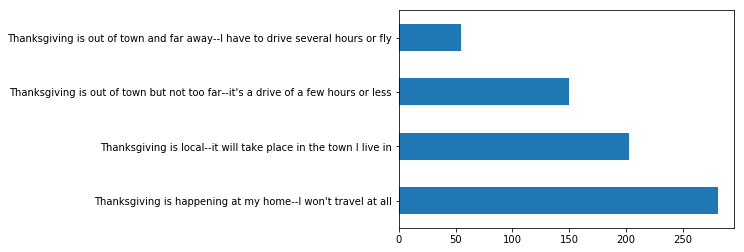

In [56]:
data3[data3['int_income'] < 150000]['How far will you travel for Thanksgiving?'].value_counts().plot('barh')

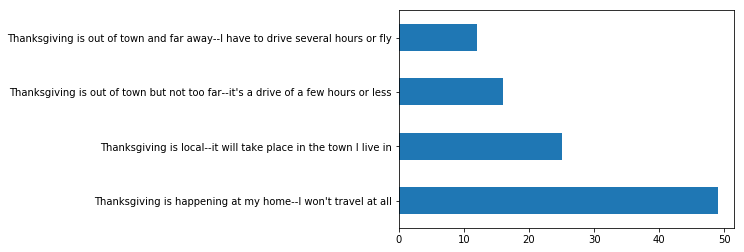

In [57]:
data3[data3['int_income'] > 150000]['How far will you travel for Thanksgiving?'].value_counts().plot('barh')

# 8: Linking Friendship and Age

In [58]:
data3.pivot_table(
    index='Have you ever tried to meet up with hometown friends on Thanksgiving night?',
    columns='Have you ever attended a "Friendsgiving?"', 
    values='int_age'
)

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [59]:
data3.pivot_table(
    index='Have you ever tried to meet up with hometown friends on Thanksgiving night?',
    columns='Have you ever attended a "Friendsgiving?"', 
    values='int_income'
)

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842
